### Loading the data

In [9]:
import pandas as pd

housing = pd.read_csv('housing.csv')
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### Quick look to the dataset

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see *total_bedrooms* has some null values

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


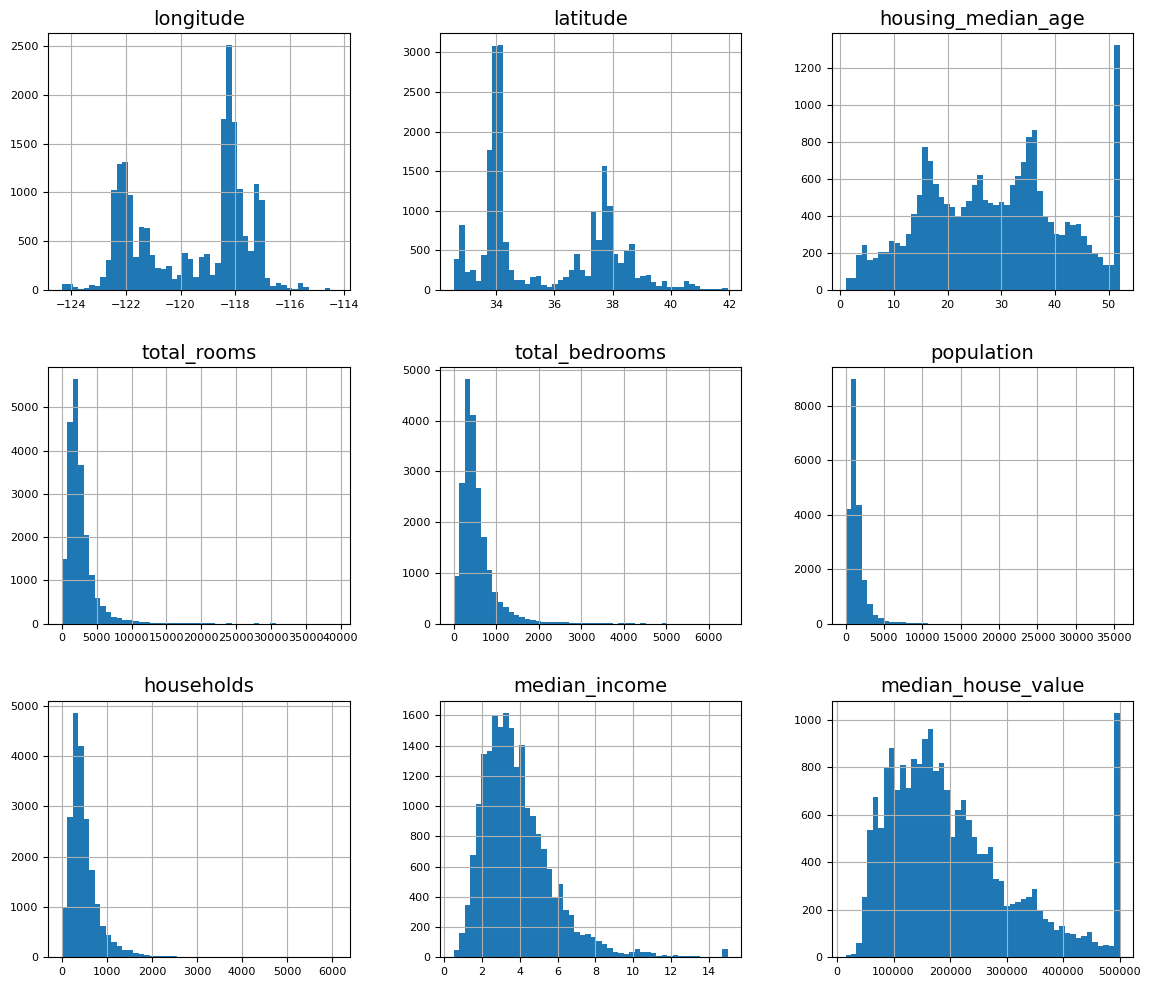

In [55]:
import matplotlib.pyplot as plt

#for defining fonts
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins = 50, figsize = (14, 12))
plt.savefig("dataset_distribution,png", dpi = 300)
plt.show()


We can see that many of the datasets are skewed i.e. not properly distributed which need some transformations. We'll see feature scaling and transformations later. For now, just observing the datasets.

### Splitting the data into training and testing sets

Random Sampling with Scikit-Learn's function *train_test_split()*

In [49]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

For stratified sampling, let us first categorized an attribute. For this, I will be choosing, *median_income()* . Since the attribute is a continuous numerical attribute, let us first convert into a categorical attribute. For this, we will use *pd.cut()* function.

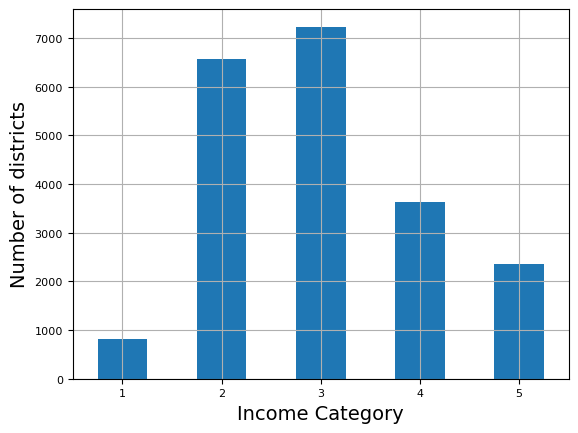

In [64]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels = [1, 2, 3, 4, 5])
#visualizing the category
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number of districts')
plt.savefig("income_category.png", dpi = 300)
plt.show()

So, now we are ready to perform stratified sampling based on the income category that we just created. 

In [89]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing['income_cat'],
                                                   random_state = 42)

#observing the proportion of each categories in test_set
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

#removing the income_cat column as we won't be using it later
for income_cat in (strat_train_set, strat_test_set):
    income_cat.drop('income_cat', inplace = True, axis = 1)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


### Exploration and Visualization of Data

In [92]:
#copying strat_train_test to housing for some manipulations

housing = strat_train_set.copy()

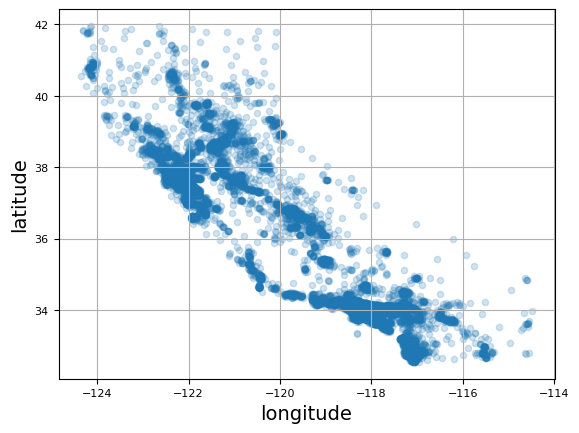

In [123]:
#Observing geographical data

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.savefig('geographical_visualization.png', dpi = 300)
plt.show()


As we can clearly observe the locations with high density of data points. Let us add various other attributes to make the visualization more clear and defining.

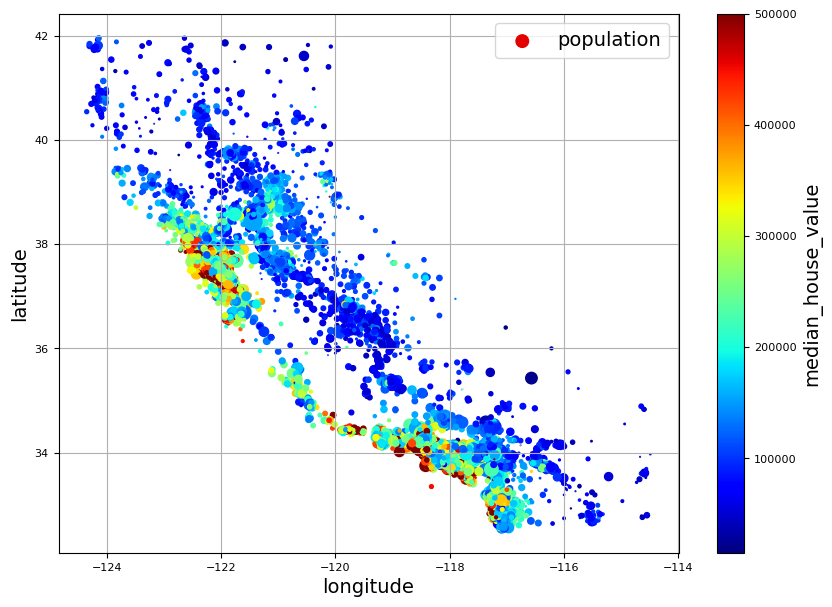

In [121]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
             s = housing['population'] / 100, label = 'population',
             c = 'median_house_value', cmap = 'jet' ,
             colorbar = True, legend = True, figsize = (10, 7))
plt.savefig('detailed_geographical_observation.png', dpi = 300)
plt.show()

With the help of above figure we can clearly observe the distribution of housing with respect to the *median_house_value* as well as *population*. Great for the insights !!!

### Looking For Correlations

In [142]:
corr_matrix = housing.drop('ocean_proximity', axis = 1).corr()

#observing the correlations of other attributes with median_house_value

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

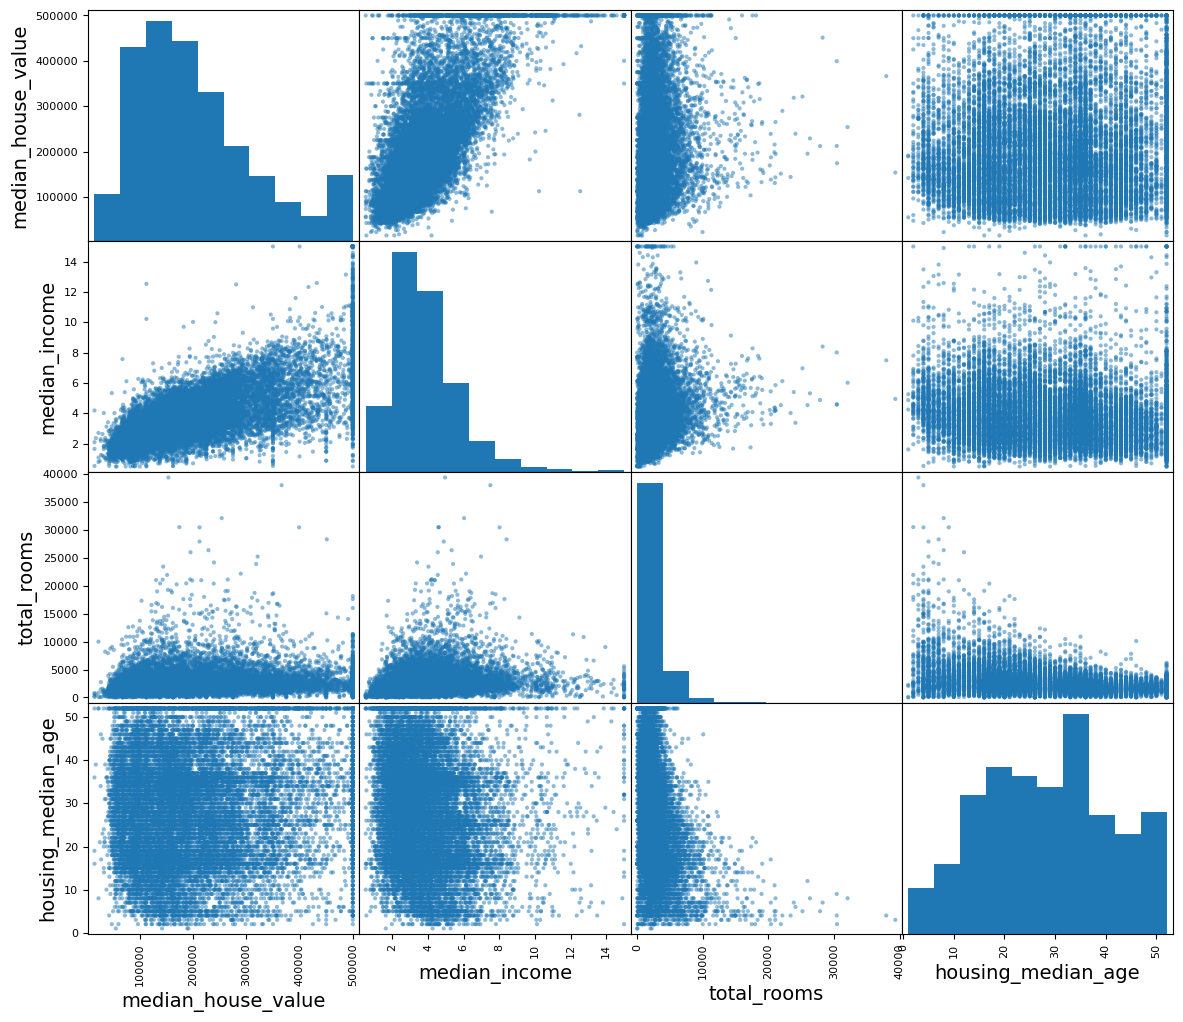

In [148]:
#Visualizing correlations with pandas scatter_matrix only taking some promising attributes

from pandas.plotting import scatter_matrix

attributes =  ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (14, 12))
plt.savefig('correlations.png', dpi = 300)
plt.show()

Seems an impactful relation between median_income and median_house_value as there is positive correlation i.e. increase in median_income cause increase in median_house_value and vice-versa. So, observing the correlation individually.

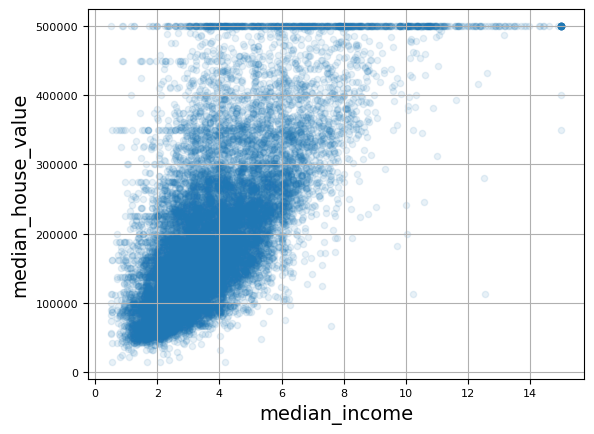

In [152]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha  = 0.1, grid = True)
plt.savefig('corr_income_value.png', dpi = 300)
plt.show()

Though the relation seems perfect, there are few data quirks that's needed to be removed !!